In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

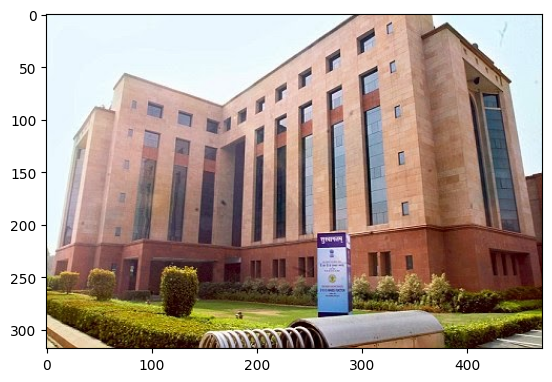

In [39]:
image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [40]:
#print image dimensions
print(image.shape)

(318, 472, 3)


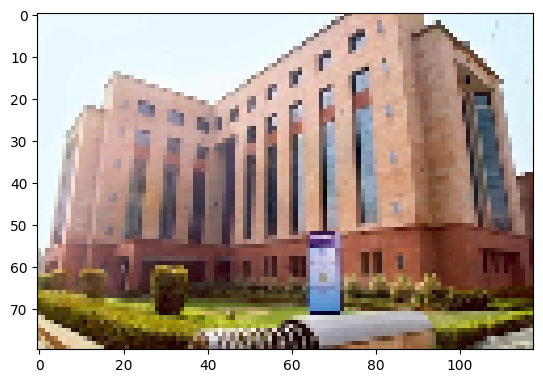

In [41]:
#resize image to 25% of original
image = cv2.resize(image, (0,0), fx=0.25, fy=0.25)
plt.imshow(image)

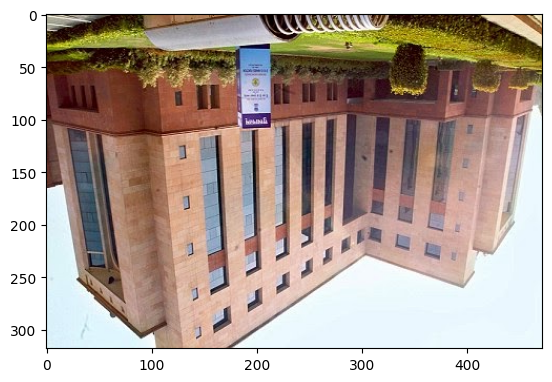

In [57]:
#rotate by 180 degrees
image180 = cv2.rotate(image, cv2.ROTATE_180)
plt.imshow(image180)

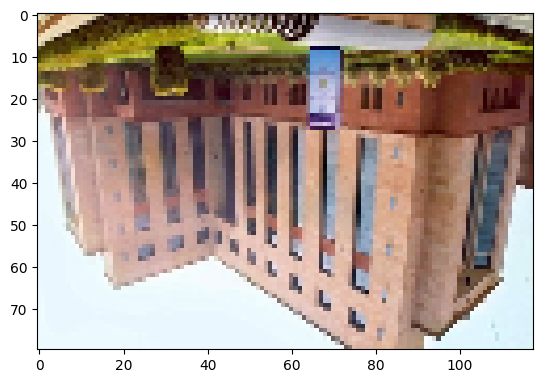

In [43]:
#flip vertically
image_flip = cv2.flip(image, 0)
plt.imshow(image_flip)

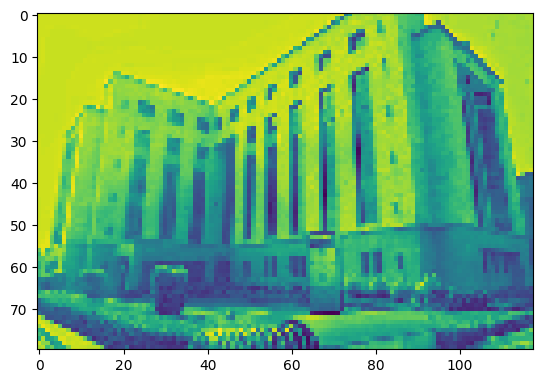

In [44]:
#extract color channel
red = image[:,:,0]
plt.imshow(red)

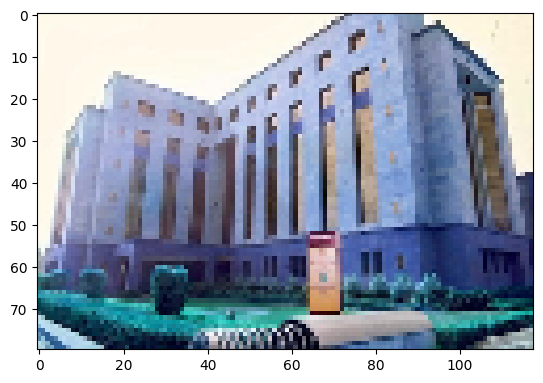

In [45]:
#swap red and blue channels
image_swap = image.copy()
image_swap[:,:,0] = image[:,:,2]
image_swap[:,:,2] = red
plt.imshow(image_swap)

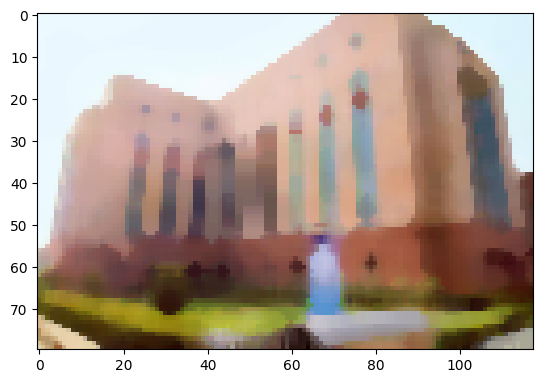

In [46]:
#median blur
image_blur = cv2.medianBlur(image, 5)
plt.imshow(image_blur)

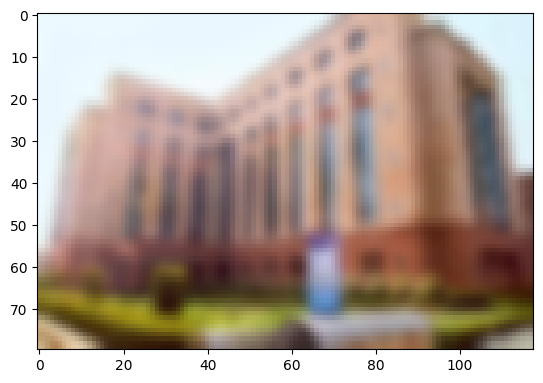

In [47]:
#gaussian blur kernel 7
image_gaussian = cv2.GaussianBlur(image, (7,7), 0)
plt.imshow(image_gaussian)

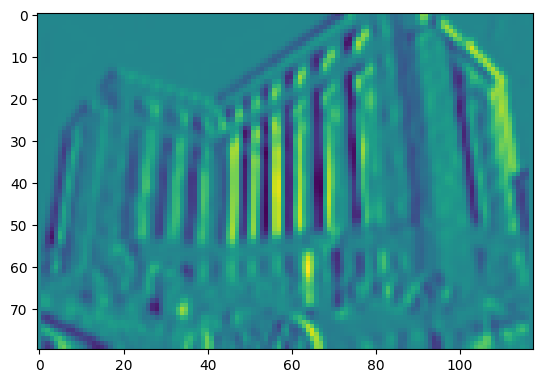

In [48]:
#sobel edge detection x axis
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx)

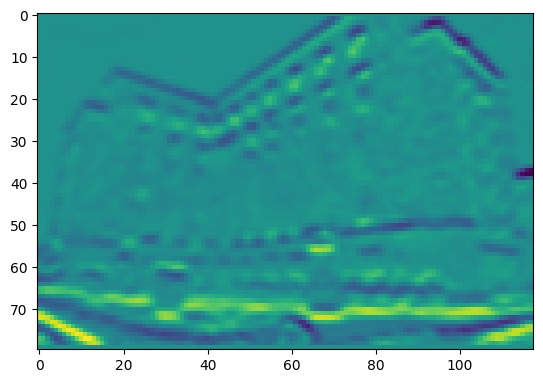

In [49]:
#sobel edge detection y axis
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobely)


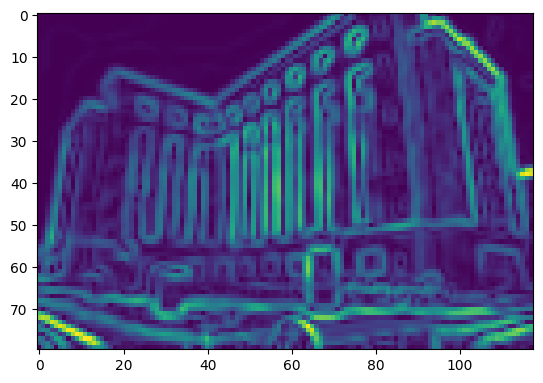

In [50]:
#combine x and y sobel
sobel = np.sqrt(sobelx**2 + sobely**2)
plt.imshow(sobel)


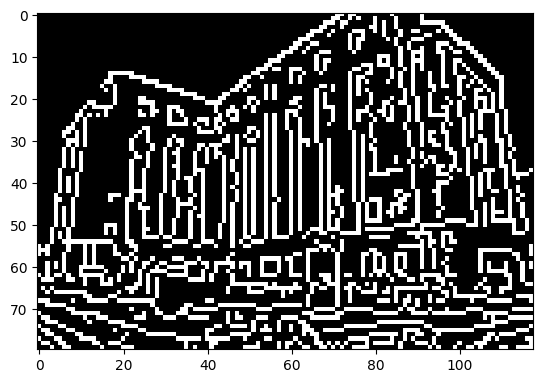

In [51]:
#canny edge detection 50,150
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(image_gray, 50, 150)
plt.imshow(canny, cmap='gray')

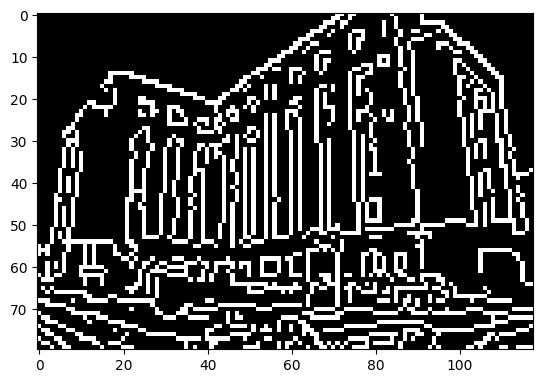

In [52]:
#canny edge detection 100,200
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(image_gray, 100, 200)
plt.imshow(canny, cmap='gray')

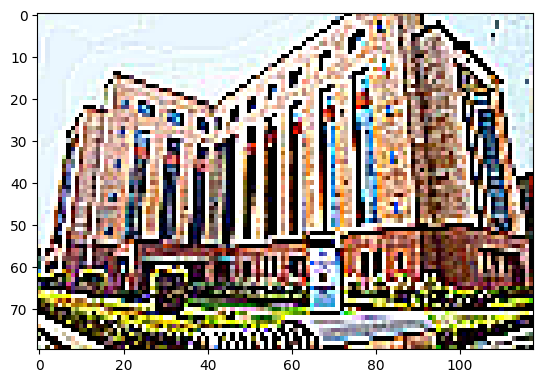

In [53]:
#apply custom filter sharpen
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp)

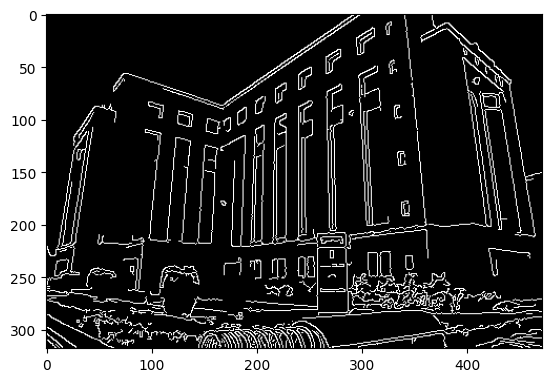

In [58]:
#gaussian blur then detect edges
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_blur = cv2.GaussianBlur(image_gray, (3,3), 0)
canny = cv2.Canny(image_blur, 100, 200)
plt.imshow(canny, cmap='gray')

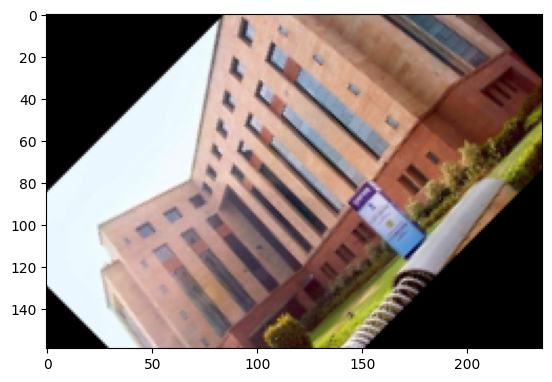

In [55]:
#transformation scale down by 50% then rotate by 45 degrees

image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
rows, cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
image_rotate = cv2.warpAffine(image, M, (cols, rows))
plt.imshow(image_rotate)


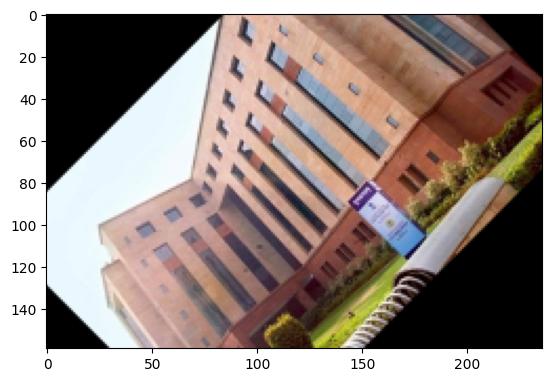

In [56]:
#transformation rotate by 45 degrees then scale down by 50%

image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rows, cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
image_rotate = cv2.warpAffine(image, M, (cols, rows))
image_rotate = cv2.resize(image_rotate, (0,0), fx=0.5, fy=0.5)
plt.imshow(image_rotate)